In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


In [2]:
# fake data
d = np.array([0, 5, 10, 20, 22, 23, 25, 26, 28, 29, 30])
v = 100-100*np.arange(len(d))/(len(d)-1)
# smooth curve
d_smooth = np.linspace(d.min(), d.max(), 100)
spl = make_interp_spline(d, v, k=3)
spl_ = make_interp_spline(v[::-1],d[::-1], k=3)
v_smooth = spl(d_smooth)


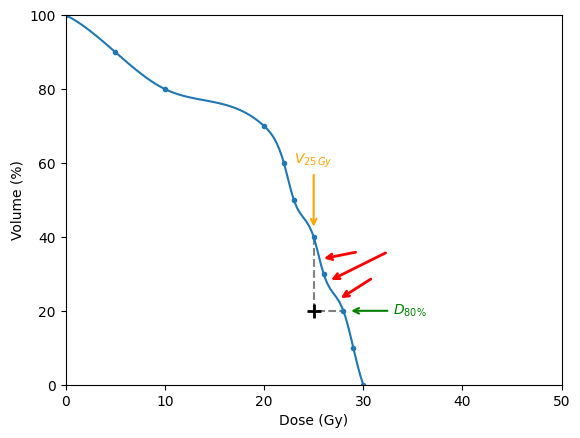

In [3]:
# constraint ticks
plt.plot([25, 25, d[8]], [40, 20, 20], color='grey', linestyle='--')
plt.plot(25, 20, '+', color='k', ms=10, markeredgewidth=2)
# constraint "pushing" arrows
plt.annotate('', xy=(25.75, 34), xytext=(29.5, 36), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate('', xy=(26.5, 28), xytext=(32.5, 36), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate('', xy=(27.5, 23), xytext=(31, 29), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate("$V_{25\,Gy}$", xy=(25, 42), xytext=(25, 60), color='orange', weight='heavy', horizontalalignment='center',\
             arrowprops=dict(arrowstyle="->", color='orange', lw=1.5))
plt.annotate("$D_{80\%}$", xy=(d[8]+0.5, 20), xytext=(d[8]+5, 20), color='green', weight='heavy', verticalalignment='center',\
             arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
# DVH + DVH points
c = plt.plot(d_smooth, v_smooth)
plt.plot(d, v, ".", color=c[0].get_color())

# axes labels
plt.xlabel('Dose (Gy)')
plt.ylabel('Volume (%)')
# axes limits
plt.ylim(0, 100)
plt.xlim(0, 50)

plt.savefig('constraint_plot.pdf', bbox_inches='tight')
plt.show()